# Manually Adding Pores and Throats Using Extend

In [1]:
import openpnm as op
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
ws = op.Workspace()
ws.settings['loglevel'] = 50

First create a simple 2D cubic network:

In [8]:
net = op.network.Cubic(shape=[5, 5, 1], spacing=1.0)

We'll now scan through each pores in the network and add 4 new pores next to each one, at the 4 corners:

In [9]:
Ps = net.Ps
Ts = net.Ts
coords = net['pore.coords']
dist = 0.3
corners = [[-1, -1], [-1, 1], [1, 1], [1, -1]]
for xdir, ydir in corners:
    adj = np.zeros_like(coords)
    adj[:, 0] = dist*xdir
    adj[:, 1] = dist*ydir
    new_coords = coords + adj
    op.topotools.extend(network=net, pore_coords=new_coords)
    new_Ps = net.Ps[-len(Ps):]
    new_conns = np.vstack((Ps, new_Ps)).T
    op.topotools.extend(network=net, throat_conns=new_conns)

After any network manipulation operation, it's a good idea to check the health of the network, which checks for disconnected pores.  All empty lists means nothing was found.

In [10]:
net.check_network_health()

{'disconnected_clusters': [], 'isolated_pores': [], 'trim_pores': [], 'duplicate_throats': [], 'bidirectional_throats': [], 'headless_throats': [], 'looped_throats': []}

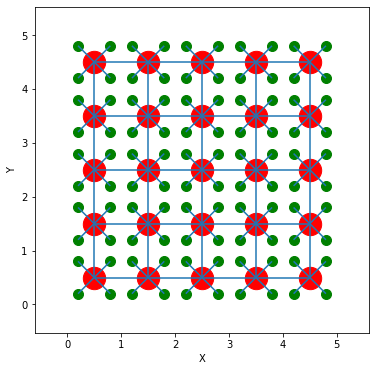

In [11]:
#NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots(1, figsize=[6, 6])
fig = op.topotools.plot_connections(network=net, throats=Ts, fig=fig, c='b')
fig = op.topotools.plot_connections(network=net, throats=net.Ts[len(Ts):], fig=fig, c='y')
fig = op.topotools.plot_coordinates(network=net, pores=Ps, c='r', s=500, fig=fig)
fig = op.topotools.plot_coordinates(network=net, pores=net.Ps[len(Ps):], c='g', s=100, fig=fig)
plt.show()